<a href="https://colab.research.google.com/github/L4ncelot1024/Learn_Deep_Learning_Le_Wagon/blob/main/Day1/01_MNIST_Classification_CHALLENGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

In [2]:

import tensorflow as tf
print(f'Tensoflowversion : {tf.__version__}')

Tensoflowversion : 2.4.1


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics

## Data

In [22]:
""" 
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. 
It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
http://yann.lecun.com/exdb/mnist/
"""
# Downloading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#### Data Types and Format

First step of a Machine Learning project is to dive into the data and get a sense of the task you're trying to solve.

In [28]:
# TODO: check out the shape, the type and the range of the data
np.set_printoptions(threshold=np.inf)
print("Shape of x_train: {}".format(x_train.shape))
print("Type of x_train: {}".format(x_train.dtype))
print(x_train[1])
print("Min value in x_train: {} ; Min value in x_train: {}".format(np.min(x_train), np.max(x_train)))

Shape of x_train: (60000, 28, 28)
Type of x_train: uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0  

<details>
<summary markdown='span'>View solution
</summary>

```python
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)
print(np.min(x_train), np.max(x_train))
```

(60000,)
[0 1 2 3 4 5 6 7 8 9]
10


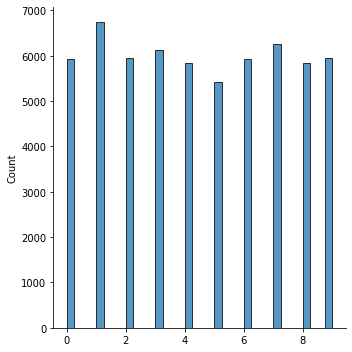

In [102]:
# TODO: check output format and the number of classes (set the variables num_outputs)
print(y_train.shape)
classes_values = np.unique(y_train)
print(classes_values)
num_outputs = len(classes_values)
print(num_outputs)
sns.displot(y_train)


<details>
<summary markdown='span'>View solution
</summary>

```python
print(y_train.shape)
classes_values = np.unique(y_train)
num_outputs = len(classes_values)
print(num_outputs)
```

#### Displaying the data

TypeError: ignored

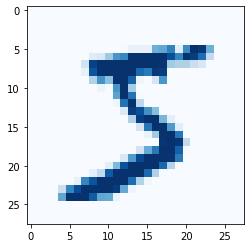

In [35]:
# TODO: Display a given image along with its class
# hint: make use of the matplotlib.pyplot library already imported as plt
ind = 0
plt.imshow(x_train[ind], cmap='Blues')
str = 'Vizualization of sample #'+ind
plt.title(str)
plt.show()

<details>
<summary markdown='span'>View solution
</summary>

```python
ind = 0
plt.imshow(x_train[ind], cmap='Greys')
plt.title('')
plt.show()
```

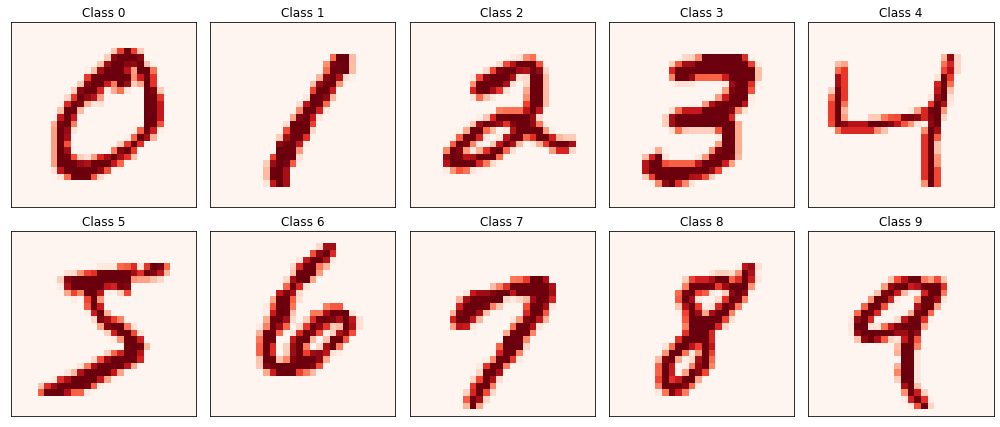

In [36]:
# TODO: display an image of each class in a grid
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(14, 6),subplot_kw={'xticks': [], 'yticks': []})
 
for ax, i in zip(axs.flat, range(num_outputs)):
    # Find an image of class i
    img_index = np.arange(len(y_train))[y_train == i][0]
    ax.imshow(x_train[img_index], cmap='Reds')
    ax.set_title(f'Class {i}')
 
plt.tight_layout()
plt.show()
 

<details>
<summary markdown='span'>Hints
</summary>

In the pyplot library, you can create a figure which will contain a grid of small containers for plot. This is done with the following code
`fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(14, 10))`
You can read more about it [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html) and see an example [here](see an example here: https://matplotlib.org/gallery/images_contours_and_fields/interpolation_methods.html#sphx-glr-gallery-images-contours-and-fields-interpolation-methods-py)

Then you just need to loop over the grid of axes (which is 2D if you ask for both several rows and columns)

</details>


<details>
<summary markdown='span'>View solution
</summary>

```python
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(14, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, i in zip(axs.flat, range(num_outputs)):
    # Find an image of class i
    img_index = np.arange(len(y_train))[y_train == i][0]
    ax.imshow(x_train[img_index], cmap='Greys')
    ax.set_title(f'Class {i}')

plt.tight_layout()
plt.show()

```

Sample distribution in train
[0.09871667 0.11236667 0.0993     0.10218333 0.09736667 0.09035
 0.09863333 0.10441667 0.09751667 0.09915   ]


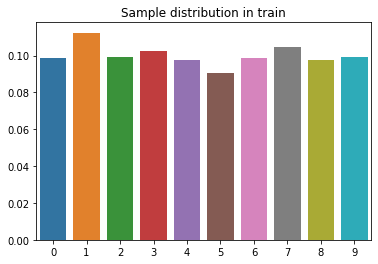

Sample distribution in test
[0.098  0.1135 0.1032 0.101  0.0982 0.0892 0.0958 0.1028 0.0974 0.1009]


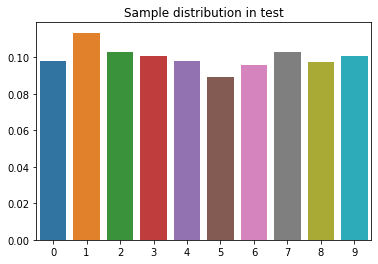

In [48]:
# TODO: check the class distribution in the train and test set
# a bar plot of the histogram of the number of samples for each class is
# a nice way of representing it
fraction_per_class_in_train = np.zeros(num_outputs)
for i in range(num_outputs):
  fraction_per_class_in_train[i] = (y_train == i).sum()
fraction_per_class_in_train /= len(y_train)
print('Sample distribution in train')
print(fraction_per_class_in_train)
sns.barplot(x= classes_values,y=fraction_per_class_in_train).set_title('Sample distribution in train')
plt.show()

fraction_per_class_in_test = np.zeros(num_outputs)
for i in range(num_outputs):
  fraction_per_class_in_test[i] = (y_test == i).sum()
fraction_per_class_in_test /= len(y_test)
print('Sample distribution in test')
print(fraction_per_class_in_test) 
sns.barplot(x= classes_values,y=fraction_per_class_in_test).set_title('Sample distribution in test')
plt.show()


<details>
<summary markdown='span'>View solution
</summary>

```python
fraction_per_class_in_train = np.zeros(num_outputs)
for i in range(num_outputs):
  fraction_per_class_in_train[i] = (y_train == i).sum()
fraction_per_class_in_train /= len(y_train)
print('Sample distribution in train')
print(fraction_per_class_in_train)

fraction_per_class_in_test = np.zeros(num_outputs)
for i in range(num_outputs):
  fraction_per_class_in_test[i] = (y_test == i).sum()
fraction_per_class_in_test /= len(y_test)
print('Sample distribution in test')
print(fraction_per_class_in_test)
```

#### Preparing the data

We need to prepare the data for our modeling part

In [50]:
# TODO: Make the input continuous in the range [0, 1]
# normalize ?
x_train_continuous = x_train / 255
x_test_continuous = x_test / 255

<details>
<summary markdown='span'>View solution
</summary>

```python
x_train_continuous = x_train / 255
x_test_continuous = x_test / 255
```

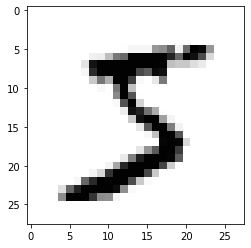

In [51]:
# TODO: display again an image to make sure you converted it correctly
ind = 0
plt.imshow(x_train_continuous[ind], cmap='Greys')
plt.show()

<details>
<summary markdown='span'>View solution
</summary>

```python
ind = 0
plt.imshow(x_train_continuous[ind], cmap='Greys')
plt.show()
```

In [63]:
# TODO: flatten the input so you can use it in a model, check the size at the end
x_train_flat = x_train_continuous.reshape(x_train_continuous.shape[0],-1)
print(x_train_flat.shape)
x_test_flat = x_test_continuous.reshape(x_test_continuous.shape[0],-1)
print(x_test_flat.shape)


(60000, 784)
(10000, 784)


<details>
<summary markdown='span'>View solution
</summary>

```python
x_train_flatten = x_train_continuous.reshape((len(x_train), -1))
x_test_flatten = x_test_continuous.reshape((len(x_test), -1))
print(x_train_flatten.shape)
```

In [73]:
# TODO: Reduce the size of your training data with a random sample of 10 000 images
# (check the numpy function np.random.randint)

# here we fix the seed of the random sampling so we all work with the same randomness
random_state = 42
np.random.seed(random_state)

#random sample of 10,000
idx_sample = np.random.randint(x_train_flat.shape[0], size=10000)
x_train_sml = x_train_flat[idx_sample]
y_train_sml = y_train[idx_sample]


<details>
<summary markdown='span'>View solution
</summary>

```python
idx_sample = np.random.randint(len(x_train_flatten), size=10000)
x_train_small = x_train_flatten[idx_sample]
y_train_small = y_train[idx_sample]
```

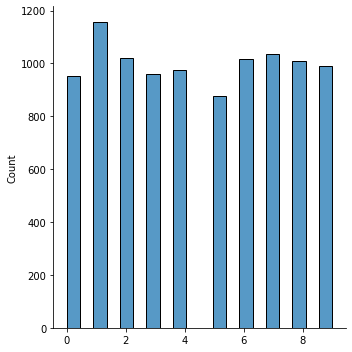

In [74]:
# TODO: check class distribution in sample


sns.displot(y_train_sml)

<details>
<summary markdown='span'>View solution
</summary>

```python
fraction_per_class_in_train = np.zeros(num_outputs)
for i in range(num_outputs):
  fraction_per_class_in_train[i] = (y_train_small == i).sum()
fraction_per_class_in_train /= len(y_train_small)
print(fraction_per_class_in_train)
```

## Linear Model

As a review of ML and to build a baseline we start with a simple multinomial logistic regression.

TODO: 

Model fitting: import the model from sklearn and fit it to your sample of data of the train set, print the accuracy on your training sample and on the test data.

Model Investigation: Check the confusion matrix and show a mis-labelled image per class

#### Modeling

In [76]:
# TODO: build and fit a LogisticRegression from the package sklearn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=random_state max_iter=1000)
lr.fit(x_train_sml,y_train_sml)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<details>
<summary markdown='span'>View solution
</summary>

```python
lr = LogisticRegression(random_state=random_state, solver='lbfgs', multi_class='multinomial')
lr.fit(x_train_small, y_train_small)
```

In [82]:
# TODO: print train and test metrics of your model
print('accuracy train:')
print(lr.score(x_train_sml,y_train_sml))
print('accuracy test:')
print(lr.score(x_test_flat,y_test))

accuracy train:
0.9716
accuracy test:
0.9045


<details>
<summary markdown='span'>View solution
</summary>

```python
accuracy_train = lr.score(x_train_small, y_train_small)
print(f'Train model accuracy: {accuracy_train}')

accuracy_test = lr.score(x_test_flatten, y_test)
print(f'Test model accuracy: {accuracy_test}')
```

#### Inspecting Results

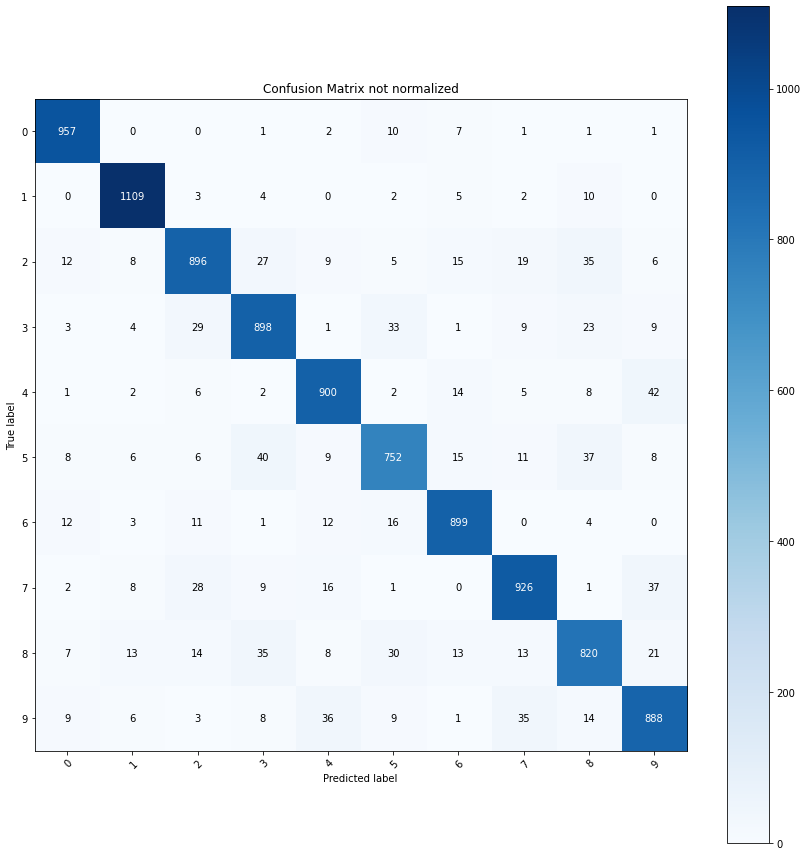

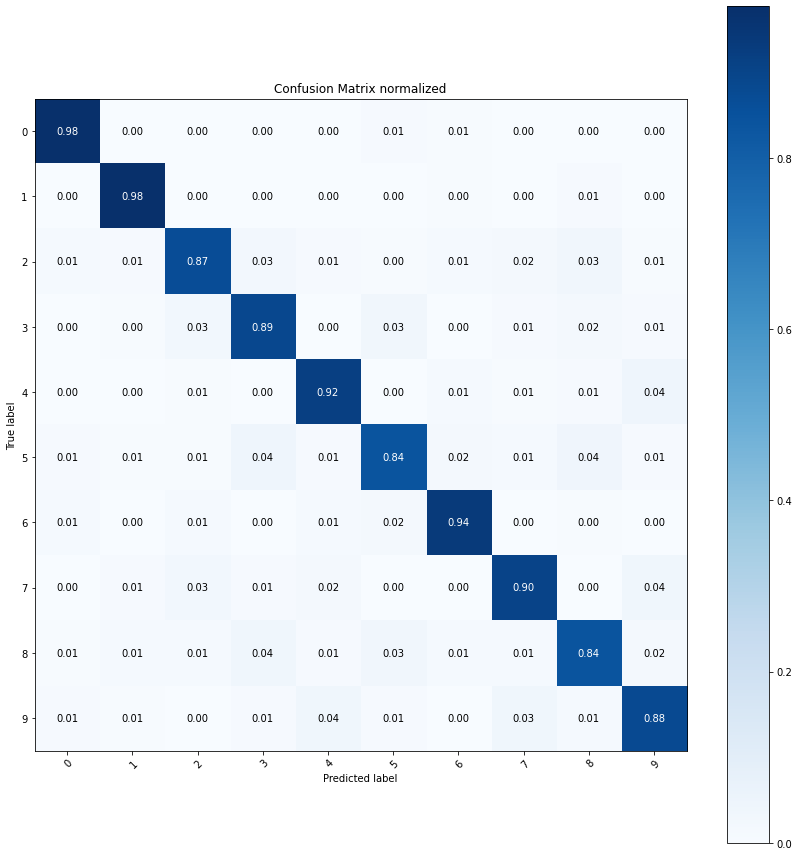

In [86]:
# TODO: Use the provided function to plot the confusion matrix,
# try with and without normalization.
# Comment your results
# you can check example here 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=(12, 12))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# To set the number of decimal for numeric types
np.set_printoptions(precision=2)

#plotting the confusion matrix
y_true = y_test
y_pred = lr.predict(x_test_flat)
classes = np.unique(y_test)
ax1 = plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Confusion Matrix not normalized',
                          cmap=plt.cm.Blues)
ax2 = plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=True,
                          title='Confusion Matrix normalized',
                          cmap=plt.cm.Blues)
plt.show()

<details>
<summary markdown='span'>View solution
</summary>

```python
y_pred = lr.predict(x_test_flatten)

class_names = np.arange(num_outputs)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
```

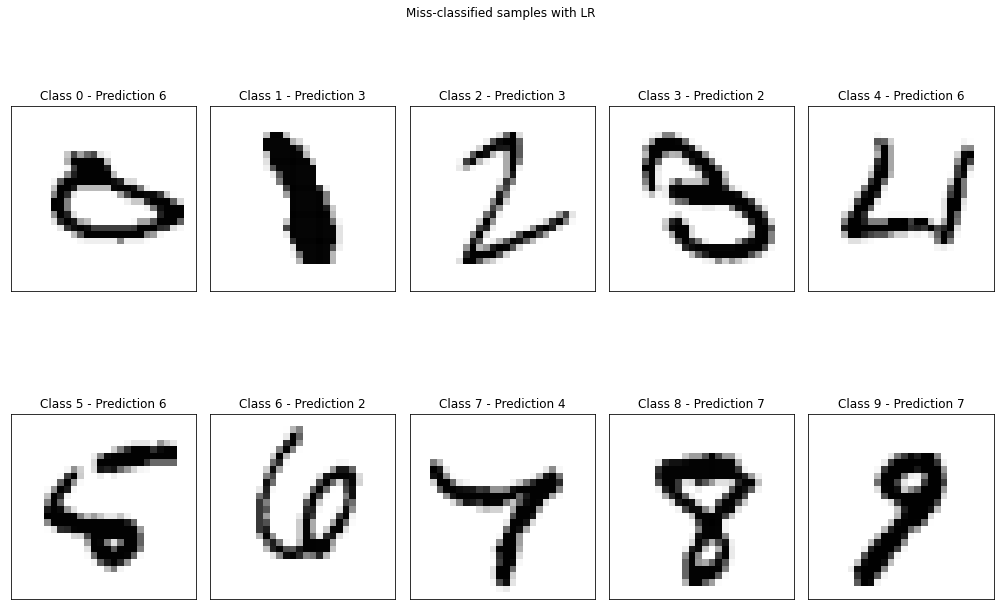

In [87]:
#A revoir
## TODO: plot mis-labelled sample in test (use plt.subplots )

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(14, 10),
                        subplot_kw={'xticks': [], 'yticks': []})
 
for ax, i in zip(axs.flat, range(num_outputs)):
    # Find a miss-classified image of class i
    img_index = np.arange(len(y_test))[(y_test == i) & (y_pred != i)][0]
    ax.imshow(x_test_continuous[img_index].reshape((28, 28)), cmap='Greys')
    ax.set_title(f'Class {i} - Prediction {y_pred[img_index]}')
 
plt.suptitle('Miss-classified samples with LR')
plt.tight_layout()
plt.show()

<details>
<summary markdown='span'>View solution
</summary>

```python
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(14, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, i in zip(axs.flat, range(num_outputs)):
    # Find a miss-classified image of class i
    img_index = np.arange(len(y_test))[(y_test == i) & (y_pred != i)][0]
    ax.imshow(x_test_continuous[img_index].reshape((28, 28)), cmap='Greys')
    ax.set_title(f'Class {i} - Prediction {y_pred[img_index]}')

plt.suptitle('Miss-classified samples with LR')
plt.tight_layout()
plt.show()
```

##Neural Network

Now let's try to improve our performance with a simple Neural Network

### Keras Functional API Overview

You have different ways ways for building a model with Tensorflow. Here we choose to use the abstraction provided by Keras, which is now part of Tensorflow so you only have to specify the layers you want and them you wrap them all into a model.

You have two main ways of doint this:

In [88]:
### Here we'll see two ways of building the exact same model

# 1st way: using the Sequential method

model1 = tf.keras.Sequential([
    # Set input_shape (as a tuple of integers, does not include the samples axis)
    # only for the first layer in a model.
    tf.keras.layers.Dense(16, activation='relu', input_shape=(64,)),
    tf.keras.layers.Dense(2, activation='softmax')
])


# 2nd way: Defining layer by layer

# This is a placeholder for your input data
img_input = tf.keras.layers.Input(shape=(64,))
x = tf.keras.layers.Dense(16, activation='relu')(img_input)
output = tf.keras.layers.Dense(2, activation='softmax')(x)

model2 = tf.keras.Model(img_input, output)


In [89]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 34        
Total params: 1,074
Trainable params: 1,074
Non-trainable params: 0
_________________________________________________________________


In [90]:
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 34        
Total params: 1,074
Trainable params: 1,074
Non-trainable params: 0
_________________________________________________________________


#### Baseline Model

In [103]:
# TODO: define a keras model using the functional API, try first a simple neural network with only one level of hidden layers
# hint: 
#   - Don't forget to compile your model, you can choose the 'adam' optimizer, chose the correct loss and ask to report the accuracy
input_shape = x_train_sml.shape[1]
print(input_shape )

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)))
model.add(tf.keras.layers.Dense(num_outputs, activation='softmax'))
model.summary()

#model.compile(optimizer='adam',loss = 'mse') #mse will throw an error as it is not adequate loss function in this case
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


784
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


<details>
<summary markdown='span'>Hints
</summary>

Don't forget to compile your model, you can choose the 'adam' optimizer, then choose the correct loss and ask to report the accuracy
</details>

<details>
<summary markdown='span'>View solution
</summary>

```python
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_outputs, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
```

In [109]:
# TODO: Training your model for 10 epochs and ask to score your test data

batch_size = 64
epochs = 10

#model.fit(x_train_sml,y_train_sml,batch_size = batch_size, epochs = epochs)
#model.evaluate(x_test_flat,y_test)
#better work with history

history = model.fit(x_train_sml,
                    y_train_sml,
                    batch_size = batch_size, 
                    epochs = epochs,
                    validation_data=(x_test_flat, y_test))

Epoch 1/10
157/157 [==============================] - 1s 4ms/step - loss: 0.0293 - accuracy: 0.9942 - val_loss: 0.1897 - val_accuracy: 0.9488
Epoch 2/10
157/157 [==============================] - 1s 4ms/step - loss: 0.0253 - accuracy: 0.9961 - val_loss: 0.1870 - val_accuracy: 0.9498
Epoch 3/10
157/157 [==============================] - 1s 4ms/step - loss: 0.0221 - accuracy: 0.9972 - val_loss: 0.1906 - val_accuracy: 0.9491
Epoch 4/10
157/157 [==============================] - 1s 4ms/step - loss: 0.0200 - accuracy: 0.9971 - val_loss: 0.1865 - val_accuracy: 0.9510
Epoch 5/10
157/157 [==============================] - 1s 4ms/step - loss: 0.0181 - accuracy: 0.9981 - val_loss: 0.1893 - val_accuracy: 0.9501
Epoch 6/10
157/157 [==============================] - 1s 4ms/step - loss: 0.0160 - accuracy: 0.9984 - val_loss: 0.1923 - val_accuracy: 0.9507
Epoch 7/10
157/157 [==============================] - 1s 4ms/step - loss: 0.0141 - accuracy: 0.9991 - val_loss: 0.1993 - val_accuracy: 0.9482
Epoch 


<details>
<summary markdown='span'>View solution
</summary>

```python

num_epochs = 10

history = model.fit(x_train_small,
          y_train_small,
          epochs=num_epochs,
          validation_data=(x_test_flatten, y_test),)

```

#### Evaluation

In [110]:
# Retrieve the metrics from your history and wrap them into a dataframe
# to manipulate them easily
history_df = pd.DataFrame(history.history).reset_index().rename(columns={'index': 'epochs'})
history_df

,epochs,loss,accuracy,val_loss,val_accuracy
0,0,0.029262,0.9942,0.189654,0.9488
1,1,0.025346,0.9961,0.186961,0.9498
2,2,0.022066,0.9972,0.190624,0.9491
3,3,0.019980,0.9971,0.186534,0.9510
4,4,0.018097,0.9981,0.189288,0.9501
5,5,0.016029,0.9984,0.192257,0.9507
6,6,0.014139,0.9991,0.199257,0.9482
7,7,0.012784,0.9991,0.192118,0.9510
8,8,0.011023,0.9996,0.195165,0.9503
9,9,0.010053,0.9995,0.194188,0.9509


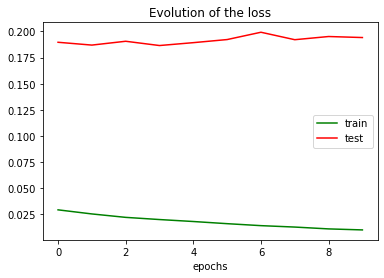

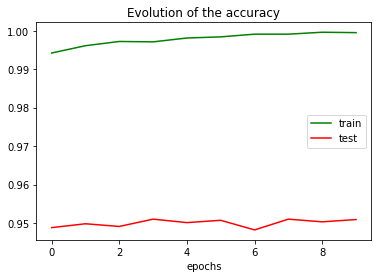

In [111]:
#revoir
# TODO: plot on the same plot the val/train curve for each metric
# using different colors
fig, ax = plt.subplots()
 
history_df.plot('epochs', 'loss', color='g', label='train', ax=ax)
history_df.plot('epochs', 'val_loss', color='r', label='test', ax=ax)
 
plt.title('Evolution of the loss')
plt.show()
 
fig, ax = plt.subplots()
 
history_df.plot('epochs', 'accuracy', color='g', label='train', ax=ax)
history_df.plot('epochs', 'val_accuracy', color='r', label='test', ax=ax)
 
plt.title('Evolution of the accuracy')
plt.show()

<details>
<summary markdown='span'>Hints
</summary>

You can use the object method `.plot()` of your dataframe, then you just need to pass as arguments the name of the columns you want to plot. Each call add a plot to the current plot. Finally to display the figure just execute `plt.show()`

</details>

<details>
<summary markdown='span'>View solution
</summary>

```python
fig, ax = plt.subplots()

history_df.plot('epochs', 'loss', color='g', label='train', ax=ax)
history_df.plot('epochs', 'val_loss', color='r', label='test', ax=ax)

plt.title('Evolution of the loss')
plt.show()

fig, ax = plt.subplots()

history_df.plot('epochs', 'accuracy', color='g', label='train', ax=ax)
history_df.plot('epochs', 'val_accuracy', color='r', label='test', ax=ax)

plt.title('Evolution of the accuracy')
plt.show()
```

#### Prediction

Here we'll predict with our Neural Network

In [113]:
# TODO: use your model to predict on your test data sample, retrieve the probabilities output and the class output
pred_test_flat=model.predict(x_test_flat)
y_pred_nn = np.argmax(pred_test_flat, axis=1)

<details>
<summary markdown='span'>View solution
</summary>

```python
predictions_test_flatten = model.predict(x_test_flatten)
y_pred_mlp = np.argmax(predictions_test_flatten, axis=1)
```

In [114]:
# We define this helper function to plot the probabilities distribution for a given prediction
def plot_value_array(i, predictions_array, true_labels):
  '''
  Plot the probabilities distribution for the prediction of index i in
  predictions_array and the true label at position i in the true_labels array.
  '''
  predictions_array, true_label = predictions_array[i], true_labels[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

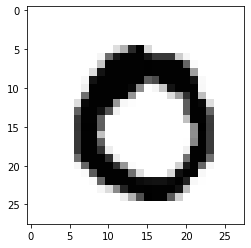

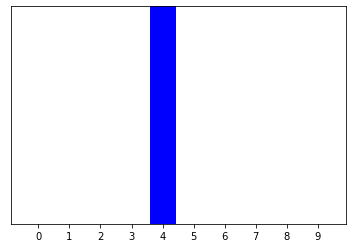

In [119]:
#revoir
# TODO: plot the prediction of some example with its image as well
ind = 56
plt.imshow(x_train_continuous[ind], cmap='Greys')
plt.show()
 
plot_value_array(ind, pred_test_flat, y_test)

<details>
<summary markdown='span'>View solution
</summary>

```python
ind = 53
plt.imshow(x_train_continuous[ind], cmap='Greys')
plt.show()

plot_value_array(ind, predictions_test_flatten, y_test)
```

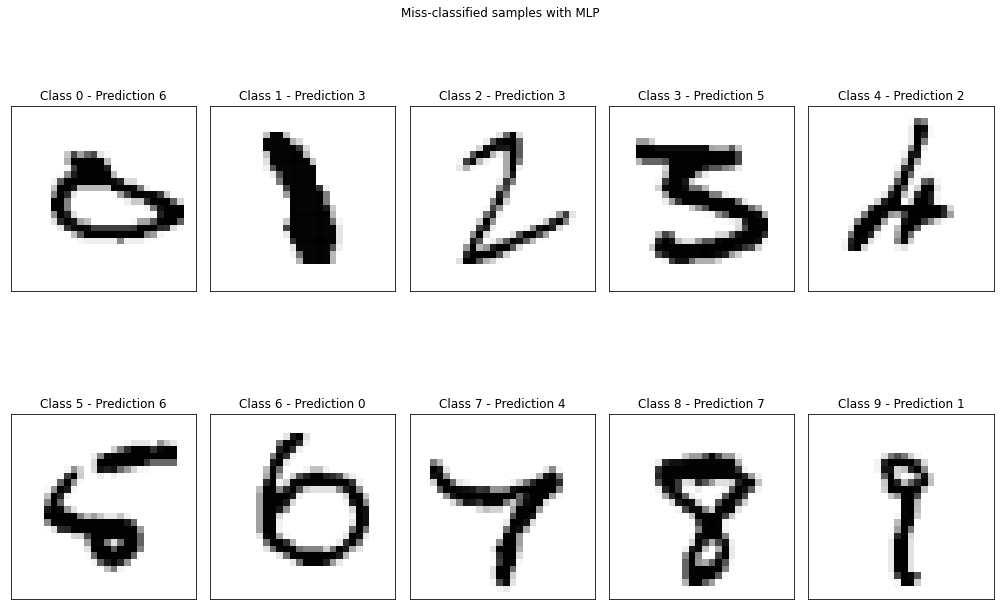

In [121]:
#revoir
# TODO: plot misclassified samples in a grid
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(14, 10),
                        subplot_kw={'xticks': [], 'yticks': []})
 
for ax, i in zip(axs.flat, range(num_outputs)):
    # Find a miss-classified image of class i
    img_index = np.arange(len(y_test))[(y_test == i) & (y_pred_nn != i)][0]
    ax.imshow(x_test_continuous[img_index].reshape((28, 28)), cmap='Greys')
    ax.set_title(f'Class {i} - Prediction {y_pred_nn[img_index]}')
 
plt.suptitle('Miss-classified samples with MLP')
plt.tight_layout()
plt.show()

<details>
<summary markdown='span'>View solution
</summary>

```python
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(14, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, i in zip(axs.flat, range(num_outputs)):
    # Find a miss-classified image of class i
    img_index = np.arange(len(y_test))[(y_test == i) & (y_pred_mlp != i)][0]
    ax.imshow(x_test_continuous[img_index].reshape((28, 28)), cmap='Greys')
    ax.set_title(f'Class {i} - Prediction {y_pred_mlp[img_index]}')

plt.suptitle('Miss-classified samples with MLP')
plt.tight_layout()
plt.show()
```

##Conclusion

Well done, you've built your first Neural Network to classify handwritten digits and beat without tuning a Machine-Learning based approach !!
